In [3]:
from Prediction import Prediction
from DataPreparation import DataPreparation
import pandas as pd
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
wdir = '/Users/francaspeth/Google Drive/Masterarbeit/Share/final/'

In [4]:
df1 = pd.read_csv(wdir+'ETC_block_2018_alldata.csv')
df2 = pd.read_csv(wdir+'ETC_block_2019_alldata.csv')
df3 = pd.read_csv(wdir+'ETC_block_2020_alldata.csv')
print(len(df1)+len(df2)+len(df3))

6578051


In [6]:
min(df1.number)

5121950

In [63]:
des = pd.concat([df1,df2,df3], ignore_index= True)

,number,hash,num_tx,avg_tx_value,avg_nonce,size,difficulty,total_difficulty,miner,gas_limit,gas_used,num_uncles,total_num_uncles,label,num_emptyblocks,time,hashrate,block_time,dummy_miner_before,dummy_miner_count
count,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06,6.578051e+06
mean,8.410975e+06,5.788081e+76,6.445186e+00,5.993980e+19,8.544667e+05,1.400450e+03,1.288957e+14,6.706565e+20,8.831147e+47,7.202678e+06,8.213397e+05,3.637810e-02,5.334781e+05,4.771626e-03,6.190715e+00,1.562322e+09,9.221864e+12,1.396393e+01,2.208613e-01,6.706864e+00
std,1.898920e+06,3.342946e+76,1.300707e+01,2.875229e+21,2.387237e+06,1.713243e+03,4.663483e+13,2.601121e+20,4.542151e+47,1.411965e+06,2.113404e+06,1.944260e-01,6.680226e+04,6.891196e-02,1.474326e+02,2.632866e+07,3.279144e+12,1.469974e+00,4.148272e-01,1.592526e+02
min,5.121950e+06,4.654812e+70,0.000000e+00,0.000000e+00,0.000000e+00,5.170000e+02,1.682852e+13,1.945128e+20,0.000000e+00,4.672676e+06,0.000000e+00,0.000000e+00,4.093760e+05,0.000000e+00,0.000000e+00,1.514765e+09,1.351258e+12,1.227000e+01,0.000000e+00,0.000000e+00
25%,6.766462e+06,2.892099e+76,0.000000e+00,0.000000e+00,0.000000e+00,5.340000e+02,1.101018e+14,4.651419e+20,5.097600e+47,6.286060e+06,0.000000e+00,0.000000e+00,4.793800e+05,0.000000e+00,0.000000e+00,1.539896e+09,7.776508e+12,1.311000e+01,0.000000e+00,0.000000e+00
50%,8.410975e+06,5.786162e+76,2.000000e+00,4.633864e+17,1.027714e+03,7.650000e+02,1.242850e+14,6.810207e+20,9.058405e+47,8.000000e+06,4.200000e+04,0.000000e+00,5.291460e+05,0.000000e+00,0.000000e+00,1.563192e+09,8.982459e+12,1.404000e+01,0.000000e+00,0.000000e+00
75%,1.005549e+07,8.683211e+76,7.000000e+00,3.166467e+18,7.542027e+04,1.499000e+03,1.572637e+14,9.210305e+20,1.275904e+48,8.000029e+06,2.730000e+05,0.000000e+00,5.954420e+05,0.000000e+00,1.000000e+00,1.585157e+09,1.087837e+13,1.422000e+01,0.000000e+00,0.000000e+00
max,1.170000e+07,1.157921e+77,4.640000e+02,3.352034e+24,1.336294e+07,1.263120e+05,2.768102e+14,1.042400e+21,1.460227e+48,1.002932e+07,9.936960e+06,6.000000e+00,6.461110e+05,1.000000e+00,7.040000e+03,1.606593e+09,2.041466e+13,2.416000e+01,1.000000e+00,7.189000e+03


In [68]:
des.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,number,hash,num_tx,avg_tx_value,avg_nonce,size,difficulty,total_difficulty,miner,gas_limit,gas_used,num_uncles,total_num_uncles,label,num_emptyblocks,time,hashrate,block_time,dummy_miner_before,dummy_miner_count
count,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000,6578051.00000
mean,8410975.00000,5788080563501692721693566892181570679377804156...,6.44519,59939795348914143232.00000,854466.71449,1400.45041,128895682415491.51562,670656508488812331008.00000,8831147443038109132505403028326229326718105026...,7202678.15457,821339.73752,0.03638,533478.14741,0.00477,6.19072,1562321718.59087,9221864348379.93359,13.96393,0.22086,6.70686
std,1898919.90213,3342945812577361914142546651243150039699131031...,13.00707,2875229147166201610240.00000,2387236.94683,1713.24329,46634833123819.96094,260112078201428541440.00000,4542151002117930798673847293674942654596304076...,1411965.46349,2113403.86085,0.19443,66802.26307,0.06891,147.43258,26328658.74493,3279144311723.76904,1.46997,0.41483,159.25259
min,5121950.00000,4654811893287709812748794378991830696453705500...,0.00000,0.00000,0.00000,517.00000,16828518183544.00000,194512838794415996928.00000,0.00000,4672676.00000,0.00000,0.00000,409376.00000,0.00000,0.00000,1514764800.00000,1351258039731.00000,12.27000,0.00000,0.00000
25%,6766462.50000,2892099348465665775326368556377425159963941016...,0.00000,0.00000,0.00000,534.00000,110101766148953.50000,465141866571208982528.00000,5097600077759461287471729301412048938067610828...,6286059.50000,0.00000,0.00000,479380.00000,0.00000,0.00000,1539895594.50000,7776507533215.00000,13.11000,0.00000,0.00000
50%,8410975.00000,5786161703092231511034349444900762771264606819...,2.00000,463386377307692160.00000,1027.71429,765.00000,124284974841682.00000,681020733412322050048.00000,9058405080058680229698361651162935675870144102...,8000000.00000,42000.00000,0.00000,529146.00000,0.00000,0.00000,1563192481.00000,8982459027930.00000,14.04000,0.00000,0.00000
75%,10055487.50000,8683211078436561065897394602316886259240157880...,7.00000,3166466984449200128.00000,75420.26667,1499.00000,157263701217331.00000,921030532082120785920.00000,1275903512969010045018712466240529133453170442...,8000029.00000,273000.00000,0.00000,595442.00000,0.00000,1.00000,1585156742.50000,10878370516277.00000,14.22000,0.00000,0.00000
max,11700000.00000,1157920882331409972312585839801819264201796362...,464.00000,3352034407793609798582272.00000,13362944.00000,126312.00000,276810201419749.00000,1042400000000000000000.00000,1460226762029380100935999827679592400772740939...,10029321.00000,9936960.00000,6.00000,646111.00000,1.00000,7040.00000,1606592921.00000,20414661468765.00000,24.16000,1.00000,7189.00000


In [38]:
with open('/Users/francaspeth/Downloads/Codes2/AutoencoderETCslid5Varmedium100Epoch25May2021223858model_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Downloads/Codes2/AutoencoderETCslid5Varmedium100Epoch25May2021223858weights_only.h5')

In [78]:
cols = ['num_emptyblocks', 'hashrate', 'block_time',
       'total_num_uncles','dummy_miner_count']
timestep=10
test20 = pd.read_csv(wdir+'ETC_block_2020_alldata.csv',
                   low_memory=False)
PrepTest20 = DataPreparation(test20, timestep=timestep)
PrepTest20.df.sort_values('number')
PrepTest20.change_idx()

label_list = PrepTest20.df['label'].tolist()
PrepTest20.change_data_types(cols)

testp20 = PrepTest20.transform_data()

,number,hash,num_tx,avg_tx_value,avg_nonce,size,difficulty,total_difficulty,miner,extra_data,...,uncles,num_uncles,total_num_uncles,label,num_emptyblocks,time,dummy_miner_before,dummy_miner_count,hashrate,block_time
1,9498883,7.599873e+76,8,3.430994e+18,7897.50,1548,1.677859e+14,8.230897e+20,9.058405e+47,0x6e616e6f706f6f6c2e6f7267,...,{},0,571681,0,0,1.577837e+09,0,0,11271609502795,13.0
2,9498884,1.109543e+77,2,0.000000e+00,4980.00,765,1.678678e+14,8.230899e+20,1.602003e+47,0x76697231,...,{},0,571681,0,0,1.577837e+09,0,0,11271609502795,13.0
3,9498885,3.164160e+76,1,2.020142e+18,149.00,656,1.677858e+14,8.230901e+20,8.263200e+46,0x686f6e676b6f6e672f7777772e6f6b706f6f6c2e746f...,...,{},0,571681,0,0,1.577837e+09,0,0,11271609502795,13.0
4,9498886,9.380188e+76,0,0.000000e+00,0.00,534,1.677858e+14,8.230902e+20,1.275904e+48,0x65746865726d696e652d6574632d657531,...,{},0,571681,0,0,1.577837e+09,0,0,11271609502795,13.0
5,9498887,7.128683e+76,0,0.000000e+00,0.00,534,1.677858e+14,8.230904e+20,1.275904e+48,0x65746865726d696e652d6574632d657531,...,{},0,571681,0,1,1.577837e+09,1,0,11271609502795,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201114,11699996,3.000401e+76,0,0.000000e+00,0.00,529,5.431082e+13,1.042400e+21,1.275904e+48,0x7374726174756d2d65752d32,...,{},0,646110,0,10,1.606593e+09,1,0,4073527122551,13.0
2201115,11699997,6.555872e+76,0,0.000000e+00,0.00,1589,5.433733e+13,1.042400e+21,9.058405e+47,0x6e616e6f706f6f6c2e6f7267,...,{0xea2be044426d9ee32caafc0d00d8ce7a17bd3b445b3...,0,646110,0,11,1.606593e+09,0,1,4073527122551,13.0
2201116,11699998,4.478528e+76,1,2.327760e+15,7466.00,647,5.436387e+13,1.042400e+21,9.155576e+47,0x6d696e65645f62795f536f6c6f6d696e65,...,{},0,646110,0,12,1.606593e+09,0,0,4073527122551,13.0
2201117,11699999,7.855105e+76,0,0.000000e+00,0.00,524,5.439041e+13,1.042400e+21,1.042221e+48,0x657a696c2e6d65,...,{},1,646111,0,0,1.606593e+09,0,0,4073527122551,13.0


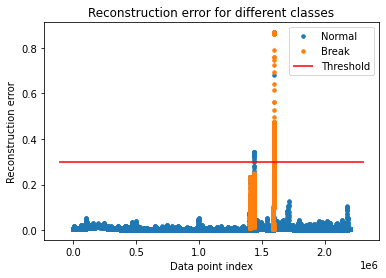

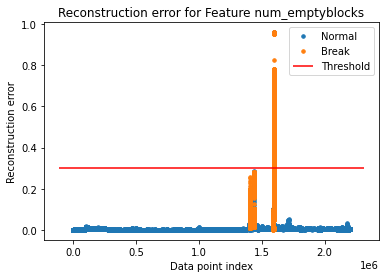

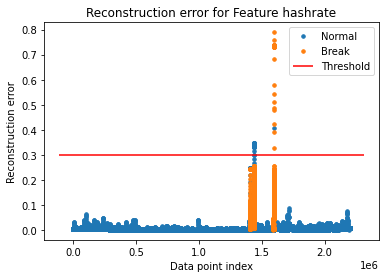

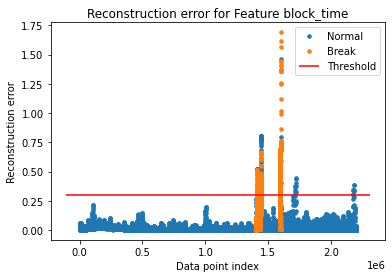

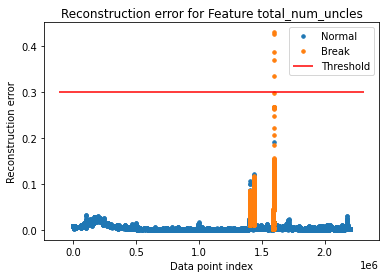

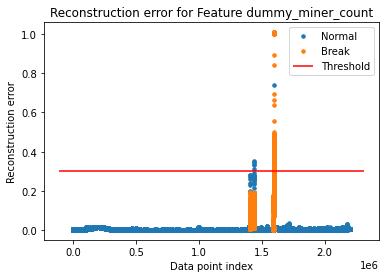

In [79]:
Pred1 = Prediction(
    model = model,
    test = testp20
)
Pred1.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

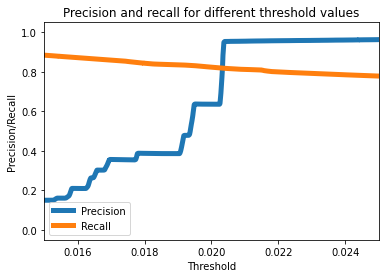

In [50]:
Pred1.plot_pr_diagram(label_list,timestep)

In [81]:
Pred1.performance(0.021,label_list, timestep)

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.04 are as follows:
[[2185199     589]
 [   2881   12439]]

% of transactions labeled as fraud that were correct (precision): 12439/(589+12439) = 95.48%
% of fraudulent transactions were caught succesfully (recall):    12439/(2881+12439) = 81.19%
Accuracy: 99.84% 
F1 Score: 0.8775927755044448


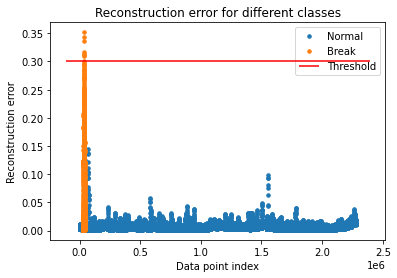

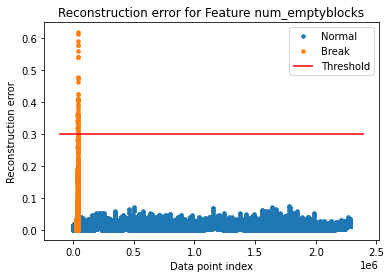

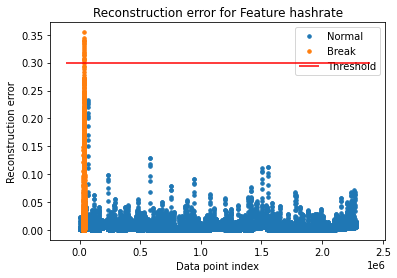

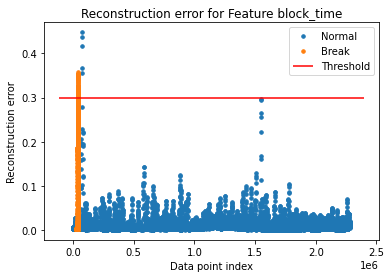

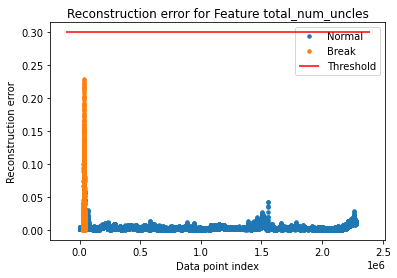

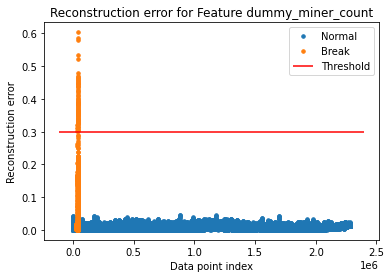

In [55]:
cols = ['num_emptyblocks', 'hashrate', 'block_time',
       'total_num_uncles','dummy_miner_count']
timestep=10
test19 = pd.read_csv(wdir+'ETC_block_2019_alldata.csv',
                   low_memory=False)
PrepTest19 = DataPreparation(test19, timestep=timestep)
PrepTest19.df.sort_values('number')
PrepTest19.change_idx()
#PrepTest.drop_first_n_cols()
#PrepTest.add_num_empty_blocks()

label_list = PrepTest19.df['label'].tolist()
PrepTest19.change_data_types(cols)

testp19 = PrepTest19.transform_data()

Pred19 = Prediction(
    model = model,
    test = testp19
)
Pred19.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

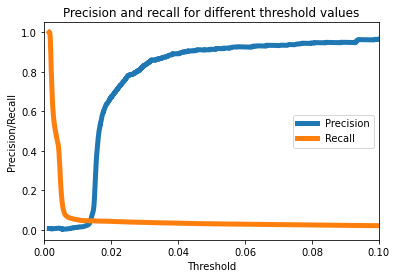

In [56]:
Pred19.plot_pr_diagram(label_list,timestep)

In [75]:
Pred19.performance(0.05,label_list, timestep)

The number of malicous blocks is: 16068 The number of normal blocks: 2264890
The classifications using the MAD method with threshold=0.04 are as follows:
[[2264833      47]
 [  15567     501]]

% of transactions labeled as fraud that were correct (precision): 501/(47+501) = 91.42%
% of fraudulent transactions were caught succesfully (recall):    501/(15567+501) = 3.12%
Accuracy: 99.32% 
F1 Score: 0.06030332209918151


## Model with 4 Variables 

In [21]:
with open('/Users/francaspeth/Downloads/Codes2/AutoencoderETCslid4Varmedium100Epoch26May2021000409model_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Downloads/Codes2/AutoencoderETCslid4Varmedium100Epoch26May2021000409weights_only.h5')

In [24]:
cols = ['num_emptyblocks', 'hashrate', 'block_time',
       'total_num_uncles']
timestep=10
test20 = pd.read_csv(wdir+'ETC_block_2020_alldata.csv',
                   low_memory=False)
PrepTest20 = DataPreparation(test20, timestep=timestep)
PrepTest20.df.sort_values('number')
PrepTest20.change_idx()
label_list = PrepTest20.df['label'].tolist()
PrepTest20.change_data_types(cols)

testp20 = PrepTest20.transform_data()

Pred1 = Prediction(
    model = model,
    test = testp20
)
Pred1.make_prediction()

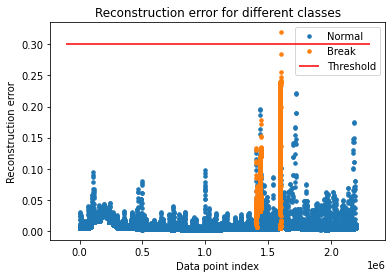

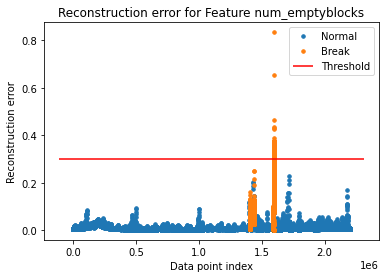

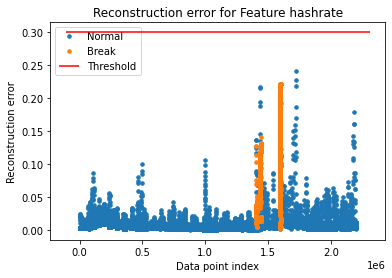

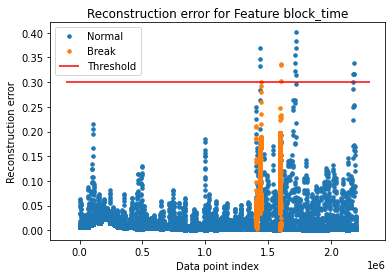

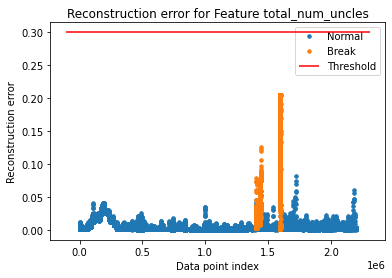

In [25]:
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

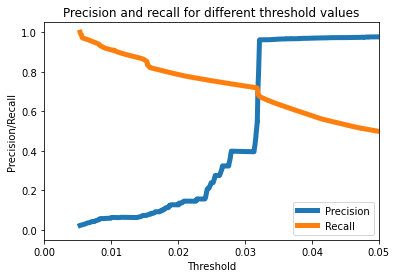

In [29]:
Pred1.plot_pr_diagram(label_list,timestep)

In [35]:
Pred1.performance(0.033,label_list, timestep)

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.04 are as follows:
[[2185387     401]
 [   5176   10144]]

% of transactions labeled as fraud that were correct (precision): 10144/(401+10144) = 96.20%
% of fraudulent transactions were caught succesfully (recall):    10144/(5176+10144) = 66.21%


## With 6 Variables: 

In [23]:
with open('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETC/slidingWindow/ETCslid6Varmodel_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETC/slidingWindow/ETCslid6Varweights_only.h5')

In [24]:
cols = ['num_emptyblocks', 'hashrate', 'block_time',
       'total_num_uncles','dummy_miner_count', 'gas_limit']

In [27]:
timestep=10
test20 = pd.read_csv(wdir+'ETC_block_2020_alldata.csv',
                   low_memory=False)
PrepTest20 = DataPreparation(test20, timestep=timestep)
PrepTest20.df.sort_values('number')
PrepTest20.change_idx()
label_list = PrepTest20.df['label'].tolist()
PrepTest20.change_data_types(cols)

testp20 = PrepTest20.transform_data()

Pred1 = Prediction(
    model = model,
    test = testp20
)
Pred1.make_prediction()

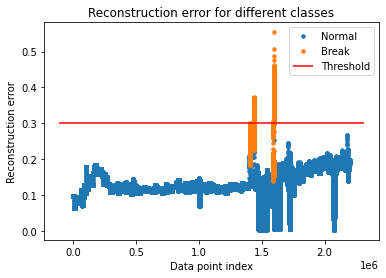

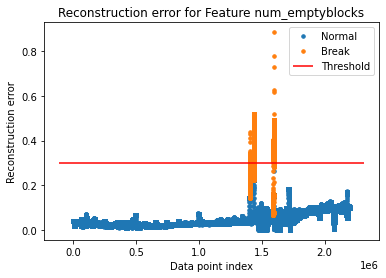

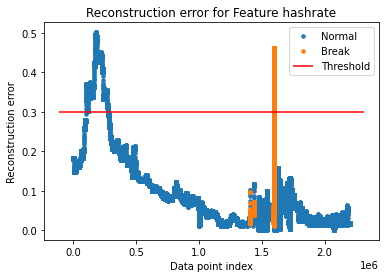

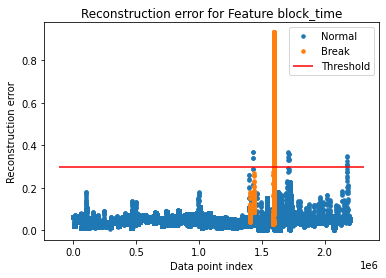

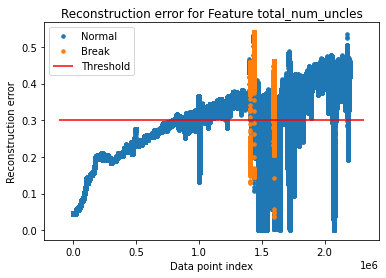

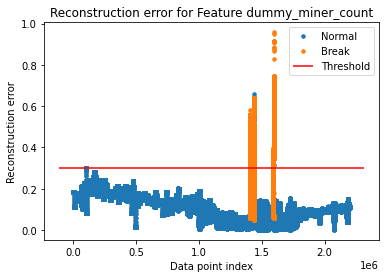

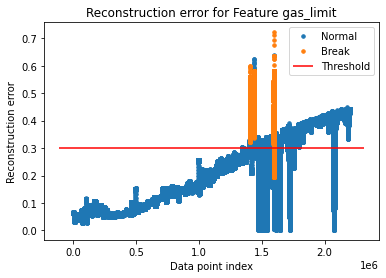

In [26]:
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

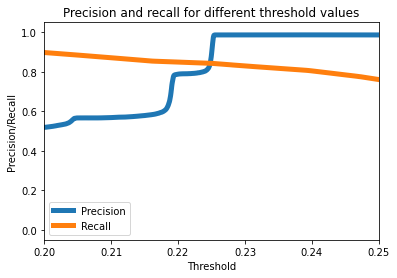

In [28]:
Pred1.plot_pr_diagram(label_list,timestep)

In [33]:
Pred1.performance(0.228,label_list, timestep)

The number of malicous blocks is: 15320 The number of normal blocks: 2185798
The classifications using the MAD method with threshold=0.04 are as follows:
[[2185612     176]
 [   2527   12793]]

% of transactions labeled as fraud that were correct (precision): 12793/(176+12793) = 98.64%
% of fraudulent transactions were caught succesfully (recall):    12793/(2527+12793) = 83.51%


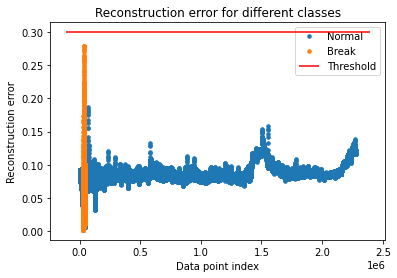

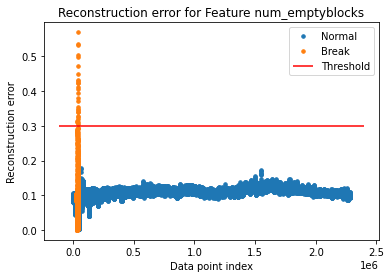

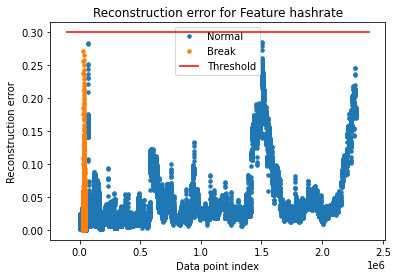

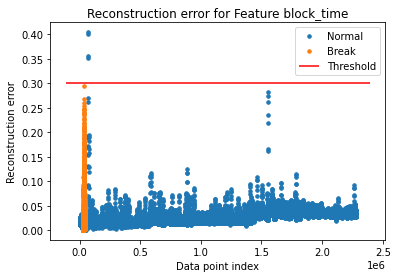

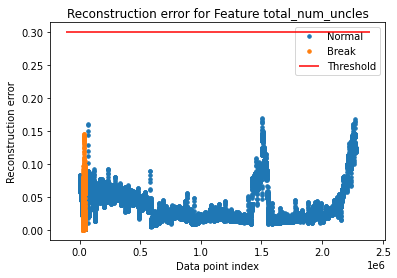

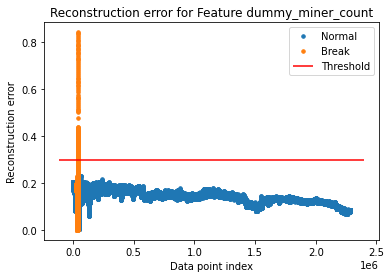

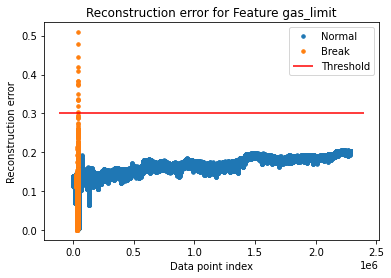

In [34]:
timestep=10
test19 = pd.read_csv(wdir+'ETC_block_2019_alldata.csv',
                   low_memory=False)
PrepTest19 = DataPreparation(test19, timestep=timestep)
PrepTest19.df.sort_values('number')
PrepTest19.change_idx()
#PrepTest.drop_first_n_cols()
#PrepTest.add_num_empty_blocks()

label_list = PrepTest19.df['label'].tolist()
PrepTest19.change_data_types(cols)

testp19 = PrepTest19.transform_data()

Pred19 = Prediction(
    model = model,
    test = testp19
)
Pred19.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

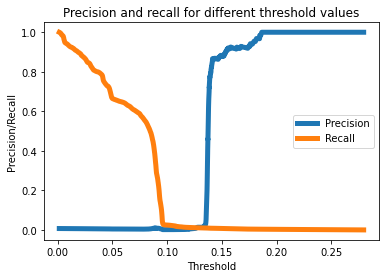

In [35]:
Pred19.plot_pr_diagram(label_list,timestep)